<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Boosting" data-toc-modified-id="Introduction-to-Boosting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Boosting</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Train-Validation-with-stratify" data-toc-modified-id="Train-Validation-with-stratify-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Validation with stratify</a></span></li><li><span><a href="#Class-Distribution" data-toc-modified-id="Class-Distribution-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Class Distribution</a></span></li><li><span><a href="#Modelling-xgboost-imbalanced-data" data-toc-modified-id="Modelling-xgboost-imbalanced-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modelling xgboost imbalanced data</a></span></li><li><span><a href="#HPO-for-imbalanced-data-using-sklearn" data-toc-modified-id="HPO-for-imbalanced-data-using-sklearn-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>HPO for imbalanced data using sklearn</a></span></li><li><span><a href="#HPO-for-imbalanced-data-using-optuna" data-toc-modified-id="HPO-for-imbalanced-data-using-optuna-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>HPO for imbalanced data using optuna</a></span><ul class="toc-item"><li><span><a href="#Optuna-Hyperparameters-Visualization" data-toc-modified-id="Optuna-Hyperparameters-Visualization-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Optuna Hyperparameters Visualization</a></span></li><li><span><a href="#Best-model-from-Optuna" data-toc-modified-id="Best-model-from-Optuna-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Best model from Optuna</a></span></li></ul></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Model-interpretation-using-eli5" data-toc-modified-id="Model-interpretation-using-eli5-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Model interpretation using eli5</a></span></li><li><span><a href="#Model-interpretation-using-shap" data-toc-modified-id="Model-interpretation-using-shap-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Model interpretation using shap</a></span></li></ul></li><li><span><a href="#Model-Evaluation-Using-Yellowbrick" data-toc-modified-id="Model-Evaluation-Using-Yellowbrick-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Evaluation Using Yellowbrick</a></span><ul class="toc-item"><li><span><a href="#class-balance" data-toc-modified-id="class-balance-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>class balance</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Classification-Report-Heatmap" data-toc-modified-id="Classification-Report-Heatmap-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Classification Report Heatmap</a></span></li><li><span><a href="#Class-Prediction-Error" data-toc-modified-id="Class-Prediction-Error-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Class Prediction Error</a></span></li><li><span><a href="#ROCAUC" data-toc-modified-id="ROCAUC-12.5"><span class="toc-item-num">12.5&nbsp;&nbsp;</span>ROCAUC</a></span></li></ul></li><li><span><a href="#Total-Time-Taken" data-toc-modified-id="Total-Time-Taken-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Total Time Taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction to Boosting
References: 
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- http://xgboost.readthedocs.org/en/latest/parameter.html#general-parameters
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://xgboost.readthedocs.io/en/latest/python/python_api.html

The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Imports

In [1]:
import time
notebook_start_time = time.time()

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


SEED = 0
RNG = np.random.RandomState(SEED)
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams.update({'font.size': 16})
plt.style.use('ggplot')
%matplotlib inline

sns.set(color_codes=True)

import six
import pickle
import joblib
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn scalar metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# roc auc and curves
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# xgboost
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# hyperparameter tuning
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample
import optuna

# model evaluation
import shap

# eli5 0.10.1 gives deprecation
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction


import scikitplot
from scikitplot import metrics as skmetrics
import yellowbrick
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ConfusionMatrix

# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


Bhishan Poudel 2021-08-09 

CPython 3.7.7
IPython 7.22.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

pandas      1.3.0
autopep8    1.5.2
joblib      1.0.1
json        2.0.9
xgboost     1.2.0
sklearn     0.23.1
optuna      2.7.0
shap        0.39.0
numpy       1.19.5
six         1.15.0
yellowbrick 1.1
seaborn     0.11.0
scikitplot  0.3.7
eli5        0.10.1



In [3]:
# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan/")

from bhishan import bp

# Useful Scripts

In [4]:
df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F0.5':[],
                        'F1':[],
                        'F2':[],
                        'AUC':[],
                        'AUCPR':[],
                        'Time Taken': [],
                        'Time Taken Sec': [],
                    })

In [5]:
def get_row_eval(model,desc,df_eval,
                 df_Xtrain,ser_ytrain,
                 df_Xtest,ser_ytest,
                 kw_fit={},
                 col_sort='F2',
                 threshold=0.5,
                 average='binary',
                 show=True
                ):
    from sklearn import metrics as skmetrics
    from sklearn import model_selection

    time_start = time.time()
    model.fit(df_Xtrain, ser_ytrain,**kw_fit)

    # cross-validation on train data
    skf = model_selection.StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
    trprobs_cv = model_selection.cross_val_predict(model, df_Xtrain, ser_ytrain,
                                   cv=skf,method='predict_proba')
    trprobs1d = trprobs_cv[:,1] # take 2nd column for probability
    trpreds = (trprobs1d>threshold).astype(np.int8)

    ytr = np.array(ser_ytrain).flatten()

    time_taken_sec = time.time() - time_start
    m,s = divmod(time_taken_sec,60)
    time_taken = f"{s:.2f} sec" if not m else f"{m} min {s:.2f} sec"

    prec,rec,thr = sklearn.metrics.precision_recall_curve(ytr,trprobs1d)
    auc_pr = sklearn.metrics.auc(rec,prec)

    row_eval = ['Xgboost',desc, 
                skmetrics.accuracy_score(ytr, trpreds),
                skmetrics.precision_score(ytr, trpreds, average=average,zero_division=0),
                skmetrics.recall_score(ytr, trpreds, average=average,zero_division=0),
                skmetrics.fbeta_score(ytr, trpreds, average=average,beta=0.5,zero_division=0),
                skmetrics.f1_score(ytr, trpreds, average=average,zero_division=0),
                skmetrics.fbeta_score(ytr, trpreds, average=average,beta=2,zero_division=0),
                skmetrics.roc_auc_score(ytr, trprobs1d), # for auc, we need probs
                auc_pr,
                time_taken,
                time_taken_sec
               ]
    
    df_eval.loc[len(df_eval)] = row_eval
    df_eval = df_eval.drop_duplicates(subset=['Model','Description'])
    df_eval = df_eval.sort_values(col_sort,ascending=False)

    # predict on test data
    yprobs = model.predict_proba(df_Xtest)
    yprobs1d = yprobs[:,1] # take 2nd column element
    ypreds = (yprobs1d>threshold).astype(np.int8)
    ytx = np.array(ser_ytest).flatten()

    if show:
        # df_eval
        display(df_eval)
        
        # confusion matrix
        print(skmetrics.confusion_matrix(ytx, ypreds))
        print(skmetrics.classification_report(ytx,ypreds))

        # feature importance
        fig,ax = plt.subplots(figsize=(12,8))
        xgb.plot_importance(model,ax=ax)
        plt.show()

    return df_eval,ypreds,yprobs1d

# Load the data

In [6]:
ifile = '../data/raw/creditcard.csv.zip'
df = pd.read_csv(ifile,compression='zip')
print(df.shape)
df.head()

(284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
target = 'Class'
df[target].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Train test split with stratify

In [8]:
from sklearn.model_selection import train_test_split

target = 'Class'
df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

ytrain_orig = ser_ytrain_orig.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

# Train Validation with stratify

In [9]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

print(df_Xtrain.shape)
df_Xtrain.head()

(182276, 30)


Time        V1        V2        V3        V4        V5        V6  \
138257   82565.0  1.118591  0.562709  0.569628  2.987496 -0.365594 -0.531789   
60033    49125.0  1.170686  0.083759  0.466278  0.913911 -0.093123  0.427588   
31064    36195.0  1.072902 -0.015166  0.942251  1.330631 -0.580474  0.206235   
245706  152869.0  2.136909  0.088646 -2.490914  0.098321  0.789008 -1.399582   
25871    33805.0 -2.448378 -1.335508  1.240431  1.800068  0.383084 -0.501160   

              V7        V8        V9  ...       V20       V21       V22  \
138257 -0.044144  0.011932 -0.129131  ... -0.204184 -0.128269 -0.218875   
60033  -0.372727  0.312777  0.129610  ... -0.226078 -0.176121 -0.584726   
31064  -0.402121  0.313133  0.410088  ... -0.251464 -0.261720 -0.665725   
245706  0.854902 -0.492912 -0.254999  ... -0.266383  0.278034  0.934892   
25871   1.080410 -0.604093 -0.319458  ... -0.720572 -0.121319  0.625541   

             V23       V24       V25       V26       V27       V28  Amount  
138257 -0.048816  0.617265  0.551384  0.060220  0.016136  0.047100     7.6  
60033   0.066051 -0.746667  0.232641 -0.547740  0.038060  0.010995     3.9  
31064   0.167535  0.163815  0.192247 -0.620974  0.050609  0.019181     9.9  
245706 -0.211839 -0.234266  0.609699  1.020898 -0.154427 -0.112532     2.0  
25871  -0.639100  0.522532 -0.073801 -0.162788  0.294912 -0.211222   411.1  

[5 rows x 30 columns]

# Class Distribution

In [10]:
from bhishan import bp

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



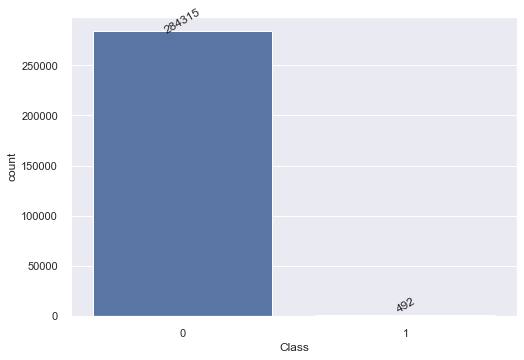

In [11]:
ax = sns.countplot(df[target])
bp.add_text_barplot(ax)

In [12]:
df[target].value_counts(normalize=True).mul(100)
# 99.8 % transaction are non-fraud
# its extremely imbalanced case.

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Modelling xgboost imbalanced data
```python
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```


[early stopping xgboost official note](https://xgboost.readthedocs.io/en/latest/python/python_intro.html):  


If early stopping occurs, the model will have three additional fields: bst.best_score, bst.best_iteration and bst.best_ntree_limit.
 Note that xgboost.train() will return a model from the last iteration, not the best one.
[Example](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)
```python
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(X_test, y_test)])

```

In [13]:
# help(XGBClassifier)

Model          Description  Accuracy  Precision   Recall      F0.5  \
0  Xgboost  default, imbalanced  0.999539   0.933934  0.78934  0.900927   

         F1        F2       AUC     AUCPR         Time Taken  Time Taken Sec  
0  0.855571  0.814563  0.971547  0.844208  2.0 min 22.04 sec      142.039664

[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



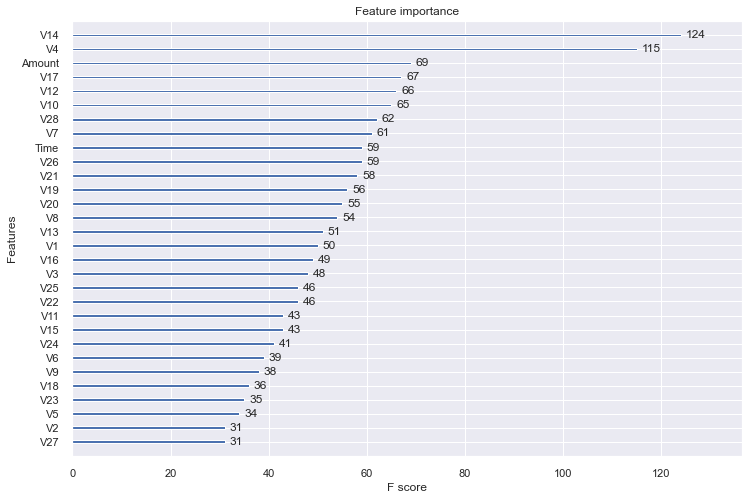

In [14]:
# current parameters
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig
Xtx = df_Xtest
ytx = ser_ytest

Xvd = np.array(df_Xvalid)
yvd = np.array(ser_yvalid)

# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED,objective='binary:logistic')

desc = 'default, imbalanced'
df_eval,ypreds,yprobs = get_row_eval(model,desc,df_eval,Xtr,ytr,Xtx,ytx)

# HPO for imbalanced data using sklearn

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')


# define grid
weights = [1, 99.8, 1000]
param_grid = dict(scale_pos_weight=weights)


# cross validation
cv = RepeatedStratifiedKFold(n_splits=5,
                             n_repeats=2,
                             random_state=SEED)

# define grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    scoring='roc_auc',
                    verbose=1
                   )

"""
# execute the grid search
grid_result = grid.fit(Xtr, ytr)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
""";

# HPO for imbalanced data using optuna
**Important Parameters**:

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.


**Regularization parameters**:

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [16]:
import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)
# use INFO to see progress

In [17]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED,n_estimators=10)
model.fit(df_Xtrain,ser_ytrain)

yprobs1d = model.predict_proba(df_Xtest)[:,1]

score = roc_auc_score(ser_ytest.to_numpy().ravel(),yprobs1d)
print(score)

[17:49:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { num_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9155406060144936


In [18]:
def objective(trial):

    params_xgb_optuna = {
        'eval_metric': 'auc',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
        'max_depth':trial.suggest_int('max_depth', 5, 20),
        'n_estimators': trial.suggest_int('n_estimators', 150, 1000), 
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 100.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
    }

    model = XGBClassifier(random_state=SEED,scale_pos_weight=0.98, **params_xgb_optuna)
    model.fit(df_Xtrain,ser_ytrain)
    
    yprobs1d = model.predict_proba(df_Xvalid)[:,1]
    score = roc_auc_score(ser_yvalid.to_numpy().ravel(),
                              yprobs1d)
    return score

In [19]:
%%time
# NOTE: there is inherent non-determinism in optuna hyperparameter selection
#       we may not get the same hyperparameters when run twice.


sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

optuna_storage = 'sqlite:///xgb_optuna_fraud_classifcation.db'
study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage=optuna_storage,
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

[I 2021-08-09 17:49:23,827] Using an existing study with name 'xgb_optuna' instead of creating a new one.
[I 2021-08-09 17:59:58,732] Trial 9 finished with value: 0.9959771378324906 and parameters: {'learning_rate': 0.01567667719550607, 'max_depth': 16, 'n_estimators': 662, 'subsample': 0.863464954899069, 'reg_alpha': 0.034828020870283326, 'reg_lambda': 0.028770084050677908}. Best is trial 4 with value: 0.9959771378324906.


CPU times: user 9min 43s, sys: 3.09 s, total: 9min 46s
Wall time: 10min 34s


In [20]:
%%time
# Resume hyper parameter from last state

sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage=optuna_storage,
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS,timeout=60)

[I 2021-08-09 17:59:59,359] Using an existing study with name 'xgb_optuna' instead of creating a new one.
[I 2021-08-09 18:07:34,047] Trial 11 finished with value: 0.9900092105373 and parameters: {'learning_rate': 0.4541416631318862, 'max_depth': 7, 'n_estimators': 960, 'subsample': 0.976958083351334, 'reg_alpha': 0.00016980882068132801, 'reg_lambda': 7.75120142601788e-06}. Best is trial 4 with value: 0.9959771378324906.


CPU times: user 4min 57s, sys: 1.64 s, total: 4min 58s
Wall time: 7min 35s


In [21]:
print(f'Number of finished trials: {len(study.trials)}')

# best trail
best_trial = study.best_trial

# best params
params_best = study.best_trial.params
params_best

Number of finished trials: 12


{'learning_rate': 0.01567667719550607,
 'max_depth': 16,
 'n_estimators': 662,
 'reg_alpha': 0.034828020870283326,
 'reg_lambda': 0.028770084050677908,
 'subsample': 0.863464954899069}

## Optuna Hyperparameters Visualization
- https://github.com/plotly/plotly.py#jupyterlab-support-python-35

We need plotly 4 to render visulization in jupyter lab.

In [22]:
from optuna.visualization import (plot_contour,
                                  plot_optimization_history,
                                  plot_parallel_coordinate,
                                  plot_slice)

In [23]:
params=['learning_rate','max_depth',
        'n_estimators','subsample','reg_alpha','reg_lambda']
optuna.visualization.plot_contour(study,params=params)

In [24]:
plot_optimization_history(study)

In [25]:
plot_parallel_coordinate(study)

In [26]:
plot_slice(study)

## Best model from Optuna

In [27]:
# time
time_start = time.time()

model_name = 'xgboost'
desc = 'grid search optuna'
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()

# use best model
params_best =  study.best_trial.params

model = xgb.XGBClassifier(random_state=SEED)
model.set_params(**params_best)

# fit and save the model
model.fit(Xtr, ytr)
joblib.dump(model,'../outputs/clf_xgb_grid_search_optuna.pkl')

# load the saved model
model = joblib.load('../outputs/clf_xgb_grid_search_optuna.pkl')

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
trprobs_cv = cross_val_predict(model, Xtr, ytr,
                               cv=skf,method='predict_proba')

threshold = 0.5
trprobs1d = trprobs_cv[:,1] # take 2nd column for probability
trpreds = (trprobs1d>threshold).astype(np.int8)

# model evaluation
average = 'binary'
row_eval = [model_name,desc, 
            accuracy_score(ytr, trpreds),
            precision_score(ytr, trpreds, average=average),
            recall_score(ytr, trpreds, average=average),
            f1_score(ytr, trpreds, average=average),
            roc_auc_score(ytr, trpreds),
            ]

print(row_eval)

['xgboost', 'grid search optuna', 0.9995347714455002, 0.9390243902439024, 0.7817258883248731, 0.8531855955678671, 0.8908189786489853]


In [28]:
df_eval.sort_values('Recall',ascending=False).style.background_gradient(subset='Recall')

In [29]:
cm = confusion_matrix(ytest,ypreds)
vals = cm.ravel()

print(cm)

print('xgboost Grid Search Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

[[56861     3]
 [   25    73]]
xgboost Grid Search Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  25
Incorrect Percent:  25.51 %


In [30]:
from bhishan.bp import plotly_binary_clf_evaluation

yprobs = model.predict_proba(df_Xtest)
yprobs = yprobs[:,0] # take only first column

plotly_binary_clf_evaluation('clf_xgb_optuna',model,ytx,ypreds,yprobs,df)

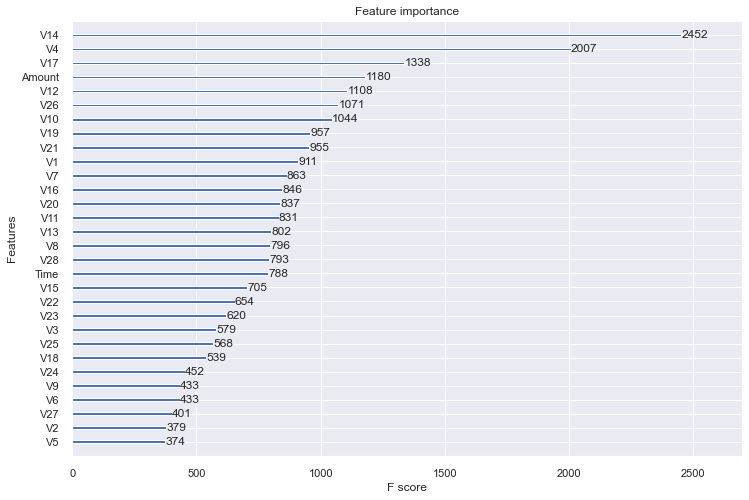

In [31]:
# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model,ax=ax)
plt.show()

# Model Interpretation

In [32]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

## Model interpretation using eli5
- https://eli5.readthedocs.io/en/latest/tutorials/xgboost-titanic.html

In [33]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [34]:
import eli5

In [35]:
eli5.show_weights(model)

In [36]:
from eli5.sklearn import PermutationImportance

feature_names = df_Xtrain.columns.tolist()

perm = PermutationImportance(model).fit(df_Xtest, ytx)
eli5.show_weights(perm, feature_names=feature_names)

In [37]:
from eli5 import show_prediction
show_prediction(model, df_Xtest.iloc[0,:],
                show_feature_values=True)

## Model interpretation using shap

In [38]:
import shap
shap.initjs()

In [39]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01567667719550607, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=662, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.034828020870283326, reg_lambda=0.028770084050677908,
              scale_pos_weight=1, subsample=0.863464954899069,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
params_xgb = dict(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, n_estimators=10,
              n_jobs=1, nthread=-1, num_eval=10, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=SEED, silent=True, subsample=1)

In [41]:
feature_names = df_Xtrain.columns.tolist()
dtrain = xgb.DMatrix(df_Xtrain, ser_ytrain,feature_names=feature_names)
dvalid = xgb.DMatrix(df_Xvalid, ser_yvalid,feature_names=feature_names)
dtest = xgb.DMatrix(df_Xtest,feature_names=feature_names)
n_rounds = 100

watchlist = [(dtrain, 'dtrain'), (dvalid, 'dvalid')]
booster = xgb.train(params_xgb,
                  dtrain,
                  n_rounds,
                  watchlist,
                  verbose_eval=10,
                  early_stopping_rounds=20)

ypreds = booster.predict(dtest)

[18:54:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators, num_eval, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	dtrain-error:0.00062	dvalid-error:0.00066
Multiple eval metrics have been passed: 'dvalid-error' will be used for early stopping.

Will train until dvalid-error hasn't improved in 20 rounds.
[10]	dtrain-error:0.00057	dvalid-error:0.00064
[20]	dtrain-error:0.00052	dvalid-error:0.00053
[30]	dtrain-error:0.00042	dvalid-error:0.00046
[40]	dtrain-error:0.00037	dvalid-error:0.00044
[50]	dtrain-error:0.00037	dvalid-error:0.00040
[60]	dtrain-error:0.00035	dvalid-error:0.00042
Stopping. Best iteration:
[43]	dtrain-error:0.00038	dvalid-error:0.00040



In [42]:
# %%time

# explainer = shap.TreeExplainer(booster_model)
# shap_values = explainer.shap_values(dtest)

# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 341: invalid start byte

In [43]:
booster.save_raw()[:100] # we need to remove string "binf"

bytearray(b'binf\x00\x00\x00?\x1e\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

In [44]:
# https://github.com/slundberg/shap/issues/1215
model_bytearray = booster.save_raw()[4:]
booster.save_raw = lambda : model_bytearray

In [45]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(dtest)

In [46]:
shap_values

array([[ 0.00056228,  0.        ,  0.00184152, ...,  0.00060604,
         0.00153309,  0.01295636],
       [-0.00140535,  0.        ,  0.00184152, ...,  0.00060604,
         0.00148837, -0.01067626],
       [ 0.00056228,  0.        ,  0.00184152, ...,  0.00013744,
         0.00163332, -0.01062816],
       ...,
       [ 0.00056228,  0.        ,  0.00184152, ...,  0.0001527 ,
         0.00163332,  0.01274112],
       [ 0.00056228,  0.        ,  0.00184152, ...,  0.00015313,
         0.00163332, -0.01062816],
       [ 0.00056228,  0.        , -0.00123289, ...,  0.0005284 ,
         0.00147824, -0.01468305]], dtype=float32)

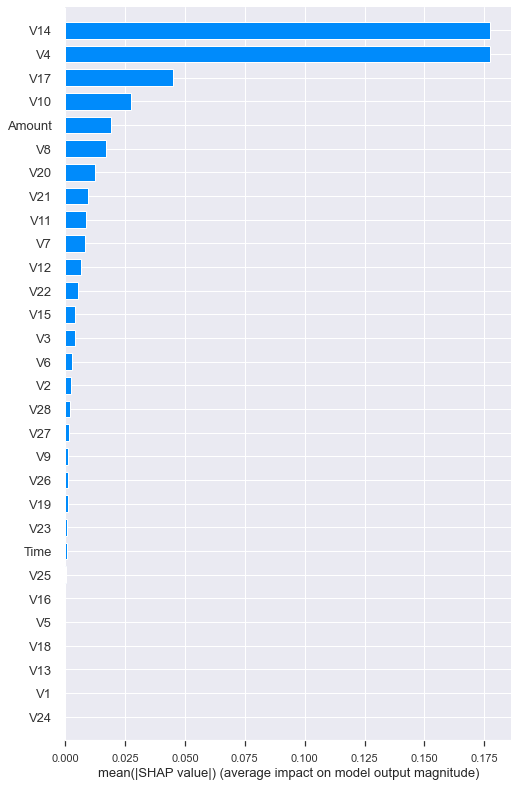

In [47]:
max_display = 30
shap.summary_plot(shap_values, df_Xtest, plot_type="bar",
                  max_display = max_display)

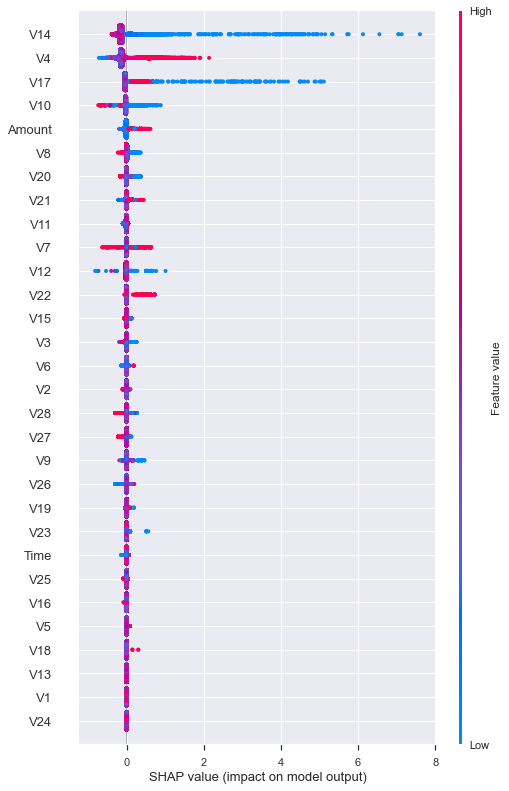

In [48]:
shap.summary_plot(shap_values, df_Xtest, plot_type='dot', max_display = max_display)

In [49]:
# Replicate Shap Importance Chart
import pprint

df_shap = pd.DataFrame(shap_values, columns = df_Xtrain.columns)
df_fimp = df_shap.abs().mean(axis = 0).sort_values(ascending = False)

print(df_fimp.head(max_display))

V14       0.177426
V4        0.177232
V17       0.044867
V10       0.027315
Amount    0.019141
V8        0.016938
V20       0.012650
V21       0.009589
V11       0.008855
V7        0.008476
V12       0.006581
V22       0.005277
V15       0.004186
V3        0.004122
V6        0.002781
V2        0.002555
V28       0.002115
V27       0.001481
V9        0.001234
V26       0.001087
V19       0.001074
V23       0.000836
Time      0.000783
V25       0.000453
V16       0.000107
V5        0.000091
V18       0.000034
V24       0.000000
V1        0.000000
V13       0.000000
dtype: float32


In [50]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

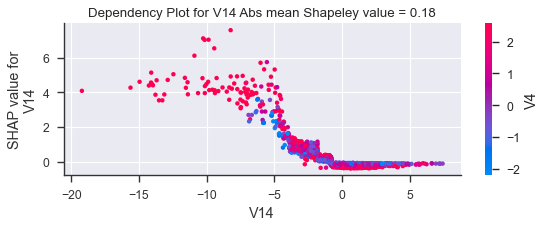

<Figure size 576x396 with 0 Axes>

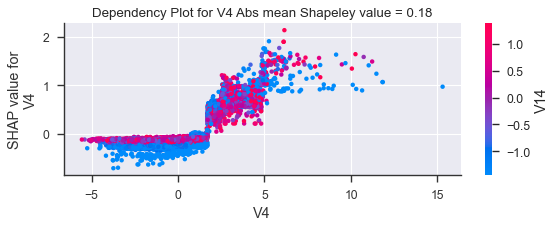

<Figure size 576x396 with 0 Axes>

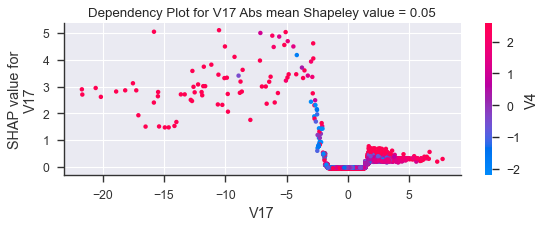

<Figure size 576x396 with 0 Axes>

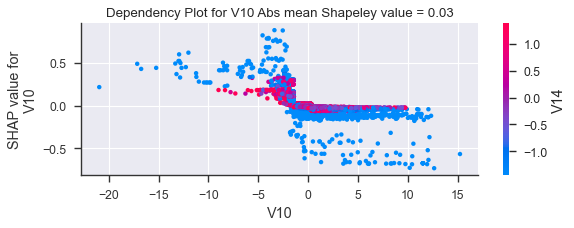

<Figure size 576x396 with 0 Axes>

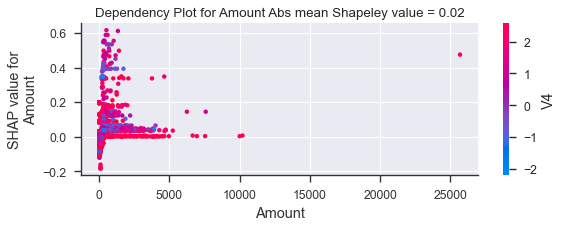

<Figure size 576x396 with 0 Axes>

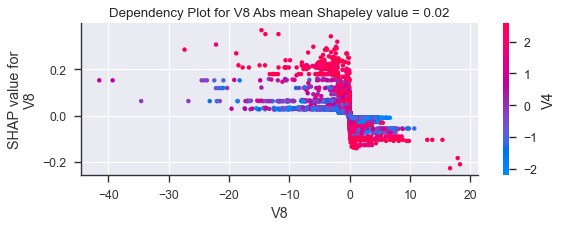

<Figure size 576x396 with 0 Axes>

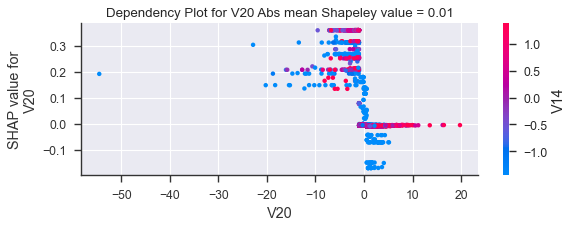

<Figure size 576x396 with 0 Axes>

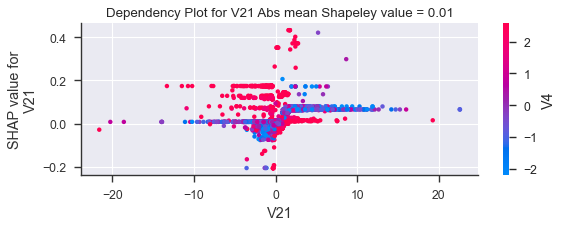

<Figure size 576x396 with 0 Axes>

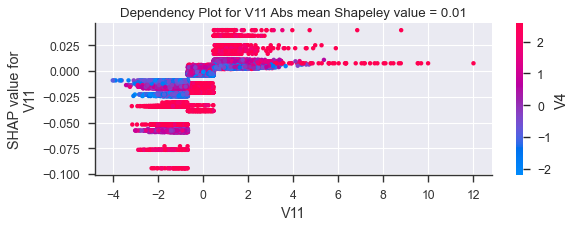

<Figure size 576x396 with 0 Axes>

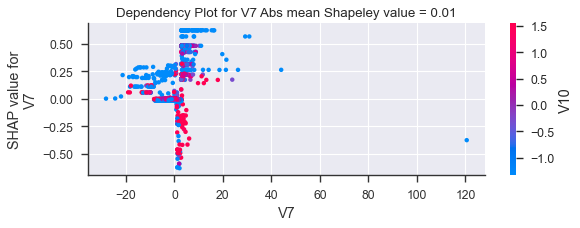

<Figure size 576x396 with 0 Axes>

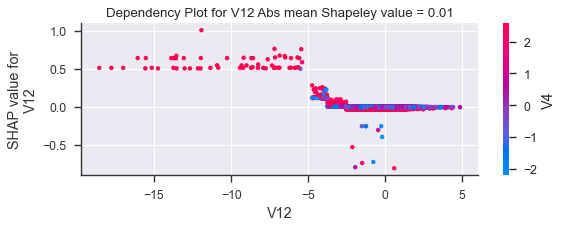

<Figure size 576x396 with 0 Axes>

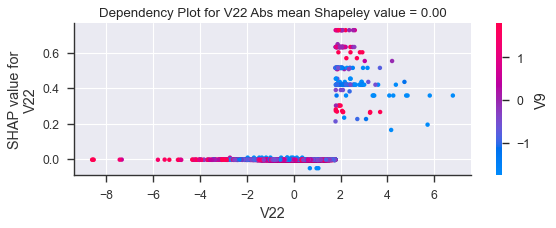

<Figure size 576x396 with 0 Axes>

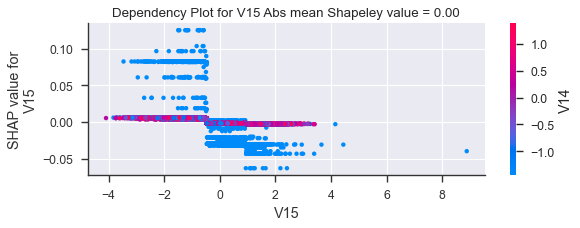

<Figure size 576x396 with 0 Axes>

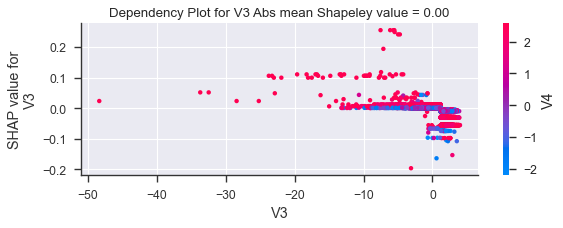

<Figure size 576x396 with 0 Axes>

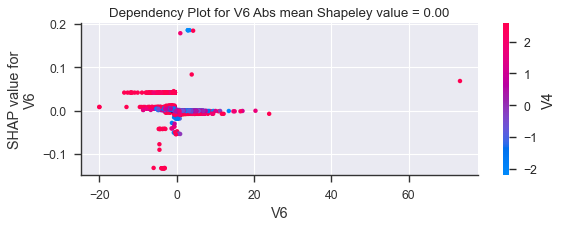

<Figure size 576x396 with 0 Axes>

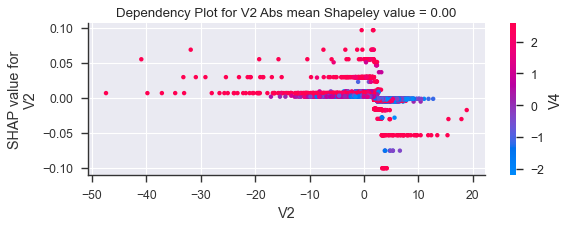

<Figure size 576x396 with 0 Axes>

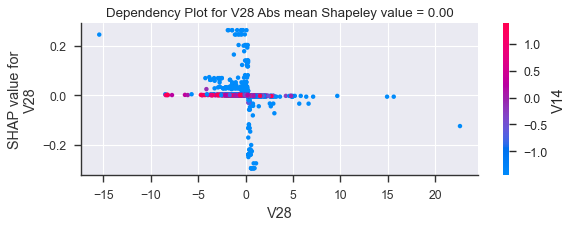

<Figure size 576x396 with 0 Axes>

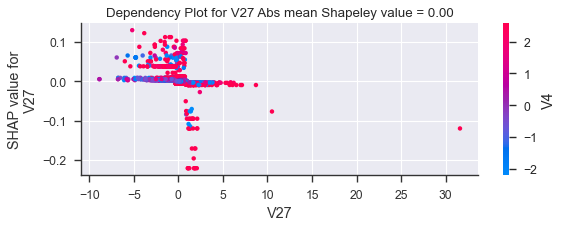

<Figure size 576x396 with 0 Axes>

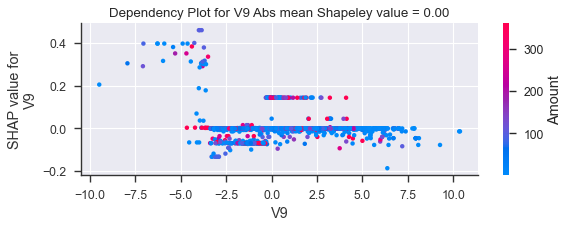

<Figure size 576x396 with 0 Axes>

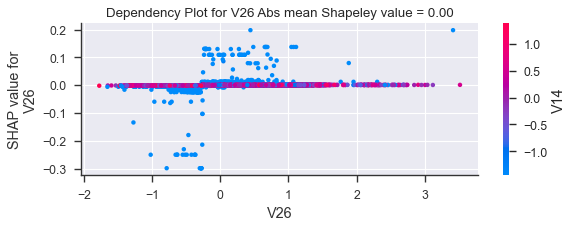

<Figure size 576x396 with 0 Axes>

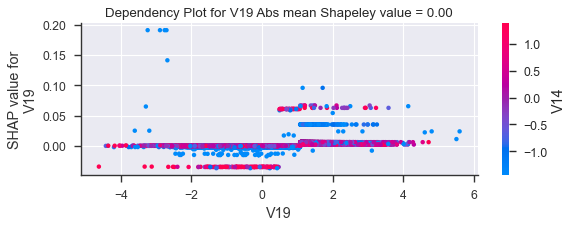

<Figure size 576x396 with 0 Axes>

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



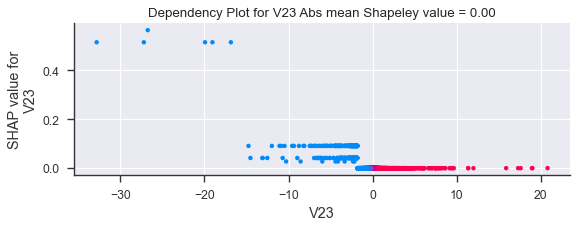

<Figure size 576x396 with 0 Axes>

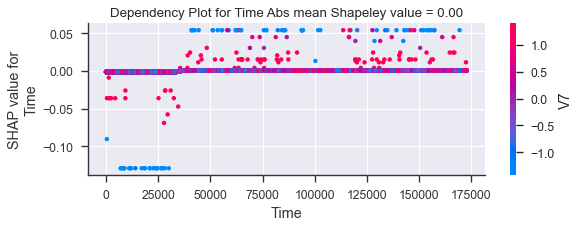

<Figure size 576x396 with 0 Axes>

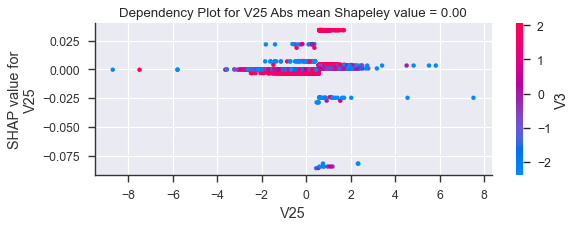

<Figure size 576x396 with 0 Axes>

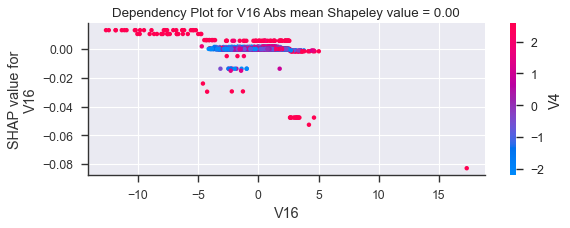

<Figure size 576x396 with 0 Axes>

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



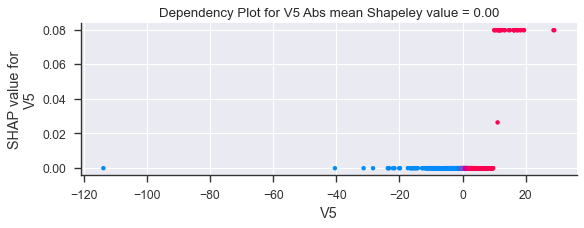

<Figure size 576x396 with 0 Axes>

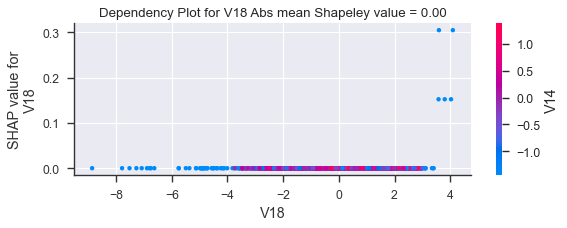

<Figure size 576x396 with 0 Axes>

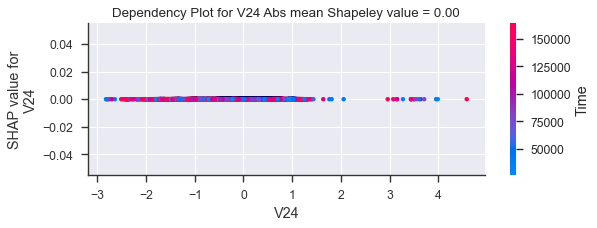

<Figure size 576x396 with 0 Axes>

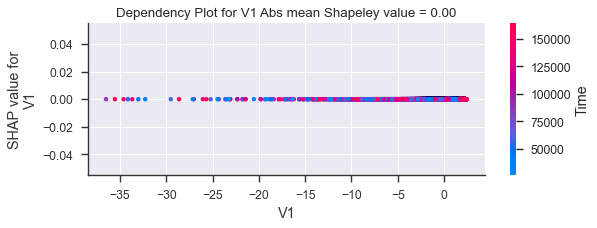

<Figure size 576x396 with 0 Axes>

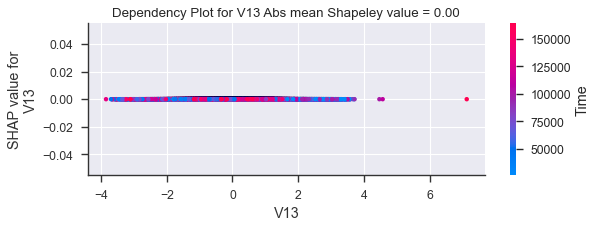

<Figure size 576x396 with 0 Axes>

In [51]:
dict_shap = (df_fimp.round(3).iloc[:max_display].to_dict())

num_subplots = len(dict_shap)
for i,v in enumerate(dict_shap):
    plt.figure(num=None, figsize=(8, 3*num_subplots),
               dpi=80, facecolor='w', edgecolor='k');
    ax1 = plt.subplot(num_subplots,1,i+1);
    
    title = f"Dependency Plot for {v.title()}"
    title += f" Abs mean Shapeley value = {dict_shap[v]:.2f}"
    
    ax1.set_title(title);
    shap.dependence_plot(v, shap_values, df_Xtest, ax = ax1)

    plt.tight_layout()
    plt.show()

In [52]:
N = 10
df_top_ytrain = ser_ytrain.reset_index().sort_values('Class',ascending=False)\
                           .head(N).reset_index(drop=True)
df_top_ytrain

index  Class
0   53591      1
1    9509      1
2  154720      1
3   52584      1
4   14197      1
5   56703      1
6  123301      1
7   16415      1
8    6331      1
9  226814      1

In [53]:
# shap_values[:N]

In [54]:
for i,v in df_top_ytrain.iterrows():
    case, result = v.to_numpy()
    print("CASE {} - Test Fraudulent".format(case))
    
    # plot force plot
    display(shap.force_plot(explainer.expected_value,
                        shap_values[i,:],
                        df_Xtest.iloc[i,:]))

CASE 53591 - Test Fraudulent


CASE 9509 - Test Fraudulent


CASE 154720 - Test Fraudulent


CASE 52584 - Test Fraudulent


CASE 14197 - Test Fraudulent


CASE 56703 - Test Fraudulent


CASE 123301 - Test Fraudulent


CASE 16415 - Test Fraudulent


CASE 6331 - Test Fraudulent


CASE 226814 - Test Fraudulent


# Model Evaluation Using Yellowbrick
- https://www.scikit-yb.org/en/latest/api/classifier/
- https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html#plotting-with-class-names

In [55]:
import yellowbrick
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ConfusionMatrix

yellowbrick.__version__

'1.1'

In [56]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [57]:
# load the saved model
model = joblib.load('../outputs/clf_xgb_grid_search_optuna.pkl')

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, df_Xtest, ser_ytest, cv=skf)
ypreds = ypreds_cv
ypreds[:5]

array([0, 0, 0, 0, 0])

## class balance

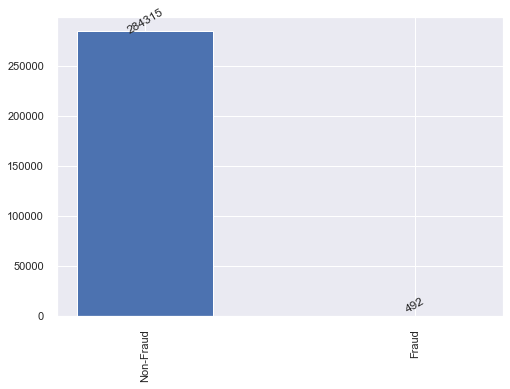

In [58]:
y = df['Class']
labels = ['Non-Fraud','Fraud']

viz = ClassBalance(labels=labels).fit(y)

bp.add_text_barplot(viz.ax)

viz.ax.set_xticks(range(len(labels)))
viz.ax.set_xticklabels(labels,rotation=90);

## Confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,ypreds)
vals = cm.ravel()

print(cm)

print('xgboost Grid Search Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

[[56853    11]
 [   30    68]]
xgboost Grid Search Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  30
Incorrect Percent:  30.61 %


/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



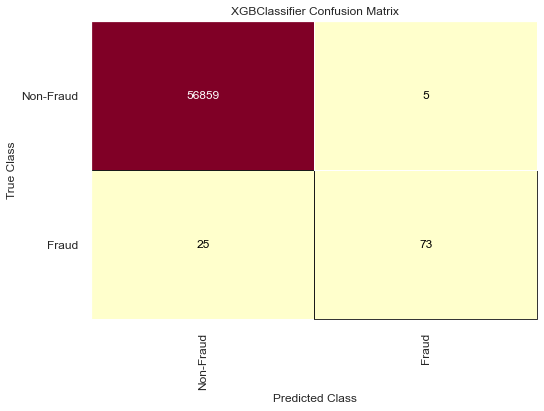

In [60]:
viz = ConfusionMatrix(model,classes=labels)
viz.fit(df_Xtrain, ser_ytrain)
viz.score(df_Xtest, ser_ytest)
viz.show()

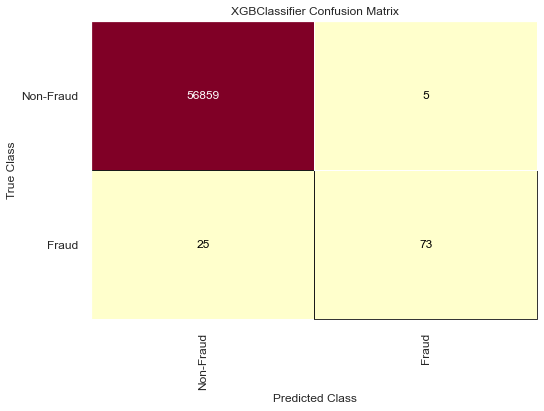

<Figure size 576x396 with 0 Axes>

In [61]:
from yellowbrick.classifier import confusion_matrix as ycm

ycm(model,
    df_Xtrain, ser_ytrain, df_Xtest, ser_ytest,
    classes=['Non-Fraud', 'Fraud']
)
plt.tight_layout();

## Classification Report Heatmap

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
print(classification_report(ytx,ypreds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.69      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



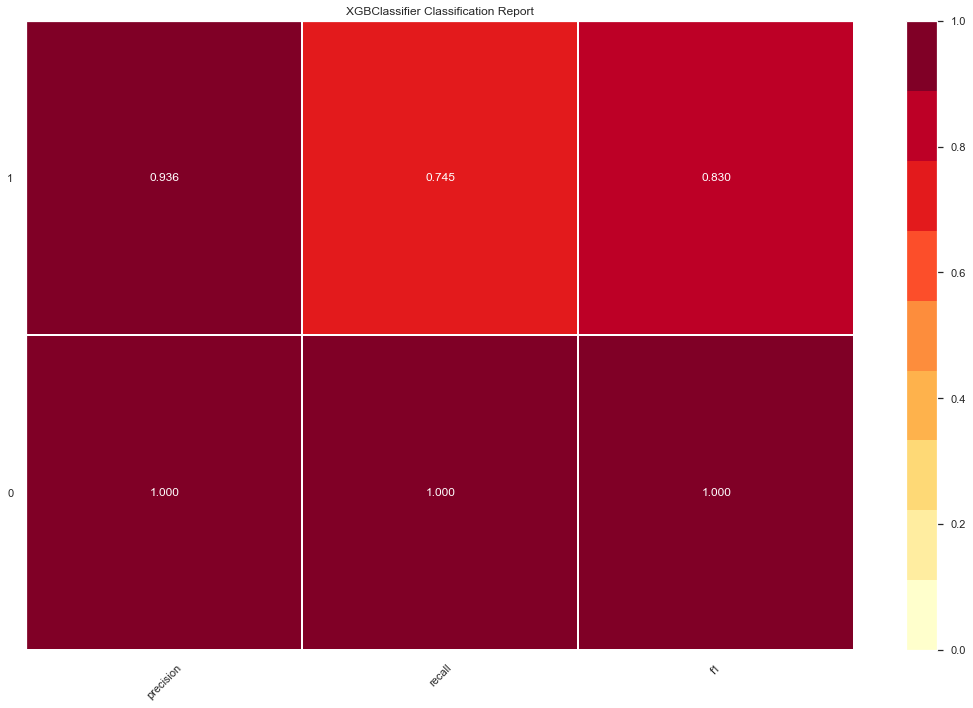

In [64]:
report = ClassificationReport(model, size=(1080, 720), labels=labels)

report.score(df_Xtest, ser_ytest)
c = report.poof()

## Class Prediction Error

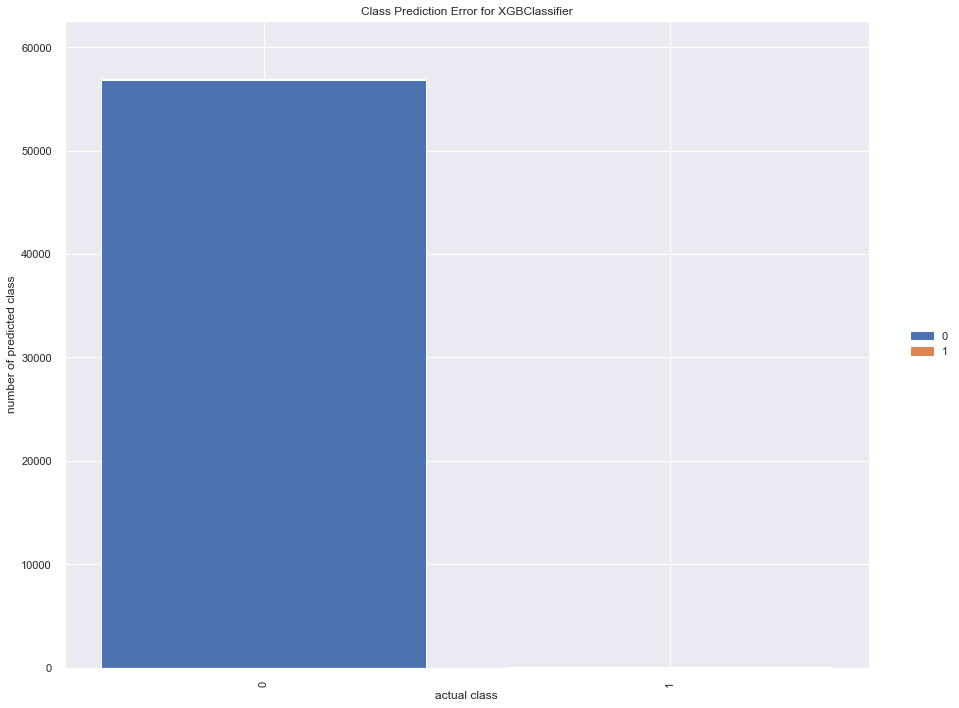

In [65]:
error = ClassPredictionError(model, size=(1080, 720), labels=labels)

error.score(df_Xtest, ser_ytest)
e = error.poof()

## ROCAUC

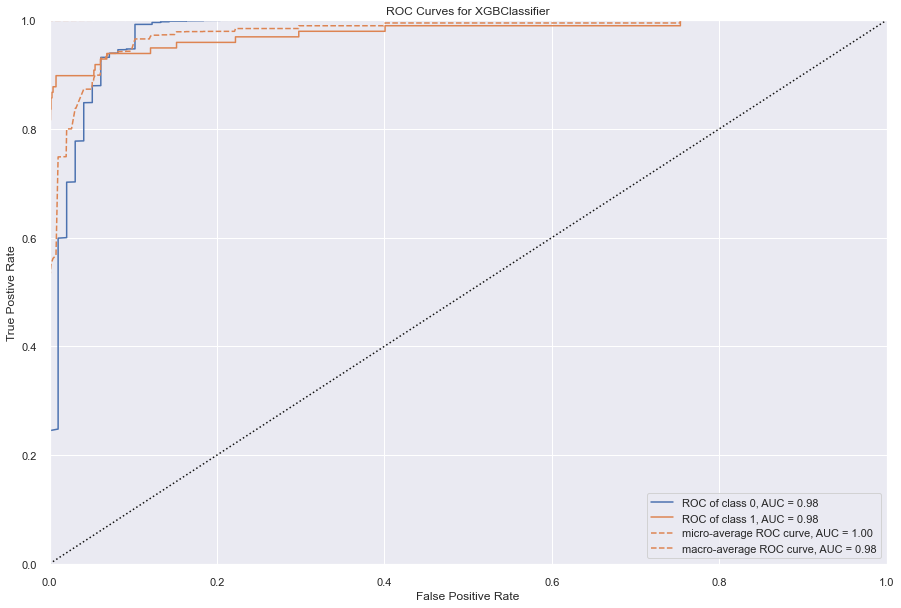

In [66]:
rocauc = ROCAUC(model, size=(1080, 720), labels=labels)

rocauc.score(df_Xtest, ser_ytest)  
r = rocauc.poof()

# Total Time Taken

In [67]:
notebook_end_time = time.time()
time_taken = time.time() - notebook_start_time
h,m = divmod(time_taken,60*60)
print('Time taken to run whole noteook: {:.0f} hr {:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole noteook: 1 hr 10 min 48 secs
